<a href="https://colab.research.google.com/github/Ronaldo-khagokpam/DEEP-LEARNING/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Images.zip

Archive:  Images.zip
   creating: Images/
   creating: Images/Maincrossingroad/
  inflating: Images/Maincrossingroad/c1.jpeg  
  inflating: Images/Maincrossingroad/c10.jpeg  
  inflating: Images/Maincrossingroad/c11.jpeg  
  inflating: Images/Maincrossingroad/c12.jpeg  
  inflating: Images/Maincrossingroad/c13.jpeg  
  inflating: Images/Maincrossingroad/c14.jpeg  
  inflating: Images/Maincrossingroad/c15.jpeg  
  inflating: Images/Maincrossingroad/c16.jpeg  
  inflating: Images/Maincrossingroad/c17.jpeg  
  inflating: Images/Maincrossingroad/c18.jpeg  
  inflating: Images/Maincrossingroad/c19.jpeg  
  inflating: Images/Maincrossingroad/c2.jpeg  
  inflating: Images/Maincrossingroad/c20.jpeg  
  inflating: Images/Maincrossingroad/c21.jpeg  
  inflating: Images/Maincrossingroad/c22.jpeg  
  inflating: Images/Maincrossingroad/c23.jpeg  
  inflating: Images/Maincrossingroad/c24.jpeg  
  inflating: Images/Maincrossingroad/c25.jpeg  
  inflating: Images/Maincrossingroad/c26.jpeg  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height,img_width=32,32
batch_size=10
train_ds=tf.keras.utils.image_dataset_from_directory(
"Images/train",
 image_size=(img_height,img_width),
 batch_size=batch_size
)
validation_ds=tf.keras.utils.image_dataset_from_directory(
"Images/validation",
 image_size=(img_height,img_width),
 batch_size=batch_size
)
test_ds=tf.keras.utils.image_dataset_from_directory(
"Images/test",
 image_size=(img_height,img_width),
 batch_size=batch_size
)

Found 89 files belonging to 3 classes.
Found 89 files belonging to 3 classes.
Found 89 files belonging to 3 classes.


In [ ]:
class_names=["Maincrossingroad","Motorcycle","Vehicle"]

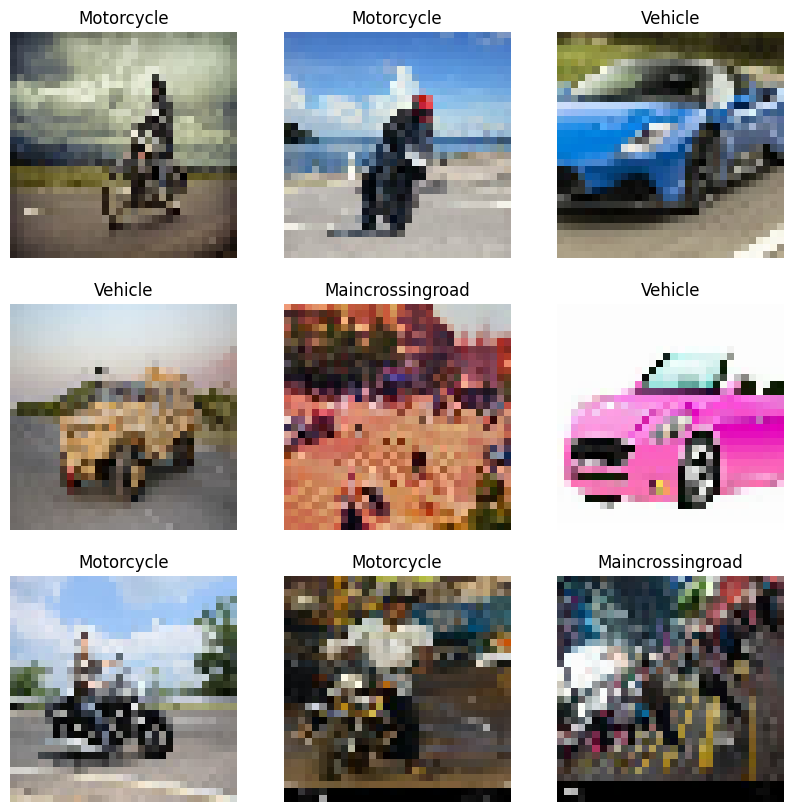

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(3)
     ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.3682 - loss: 1.1026 - val_accuracy: 0.3933 - val_loss: 1.0766
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4026 - loss: 1.0770 - val_accuracy: 0.6067 - val_loss: 1.0474
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6774 - loss: 1.0346 - val_accuracy: 0.8202 - val_loss: 0.9698
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7538 - loss: 0.9559 - val_accuracy: 0.7865 - val_loss: 0.8469
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7050 - loss: 0.8262 - val_accuracy: 0.7865 - val_loss: 0.7026
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7102 - loss: 0.7543 - val_accuracy: 0.8539 - val_loss: 0.6069
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8305 - loss: 0.6022 - val_accuracy: 0.8315 - val_loss: 0.5541
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8862 - loss: 0.5078 - val_accuracy: 0.8652 - val_loss: 0.4654

In [ ]:

model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7502 - loss: 0.6628


[0.655489981174469, 0.7528089880943298]

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  print(classifications)

tf.Tensor(
[[ 0.16403903  0.37949824  1.5821108 ]
 [ 2.1513753  -0.51095366  0.74660367]
 [-2.0599973   1.5317552   1.6476659 ]
 [-1.8172159   1.5074207   2.2097757 ]
 [ 0.43559042 -0.00795427  0.66479933]
 [-0.5713896   0.87187135  1.2958461 ]
 [ 0.34657925  0.3250527   1.2078325 ]
 [ 3.1877298  -0.90214926  0.43272176]
 [ 0.39291826  0.30321565  1.2621714 ]
 [-1.5098996   1.3631408   1.1582412 ]
 [-1.1007096   0.758494    1.5809938 ]
 [-0.67143893  0.8152307   1.1117797 ]
 [-0.83254987  1.0790913   0.6785948 ]
 [ 0.3460743   0.23483013  0.8760218 ]
 [-1.0059942   0.5767851   1.3148775 ]
 [ 1.9167019  -0.46920213  0.40516052]
 [ 0.96220183 -0.13300017  0.75119615]
 [-2.4208841   1.6755196   1.4338825 ]
 [-0.96947163  0.9063027   1.0078017 ]
 [ 1.4683155  -0.37392986  0.4036218 ]], shape=(20, 3), dtype=float32)


<Figure size 1000x1000 with 0 Axes>

In [ ]:
import numpy

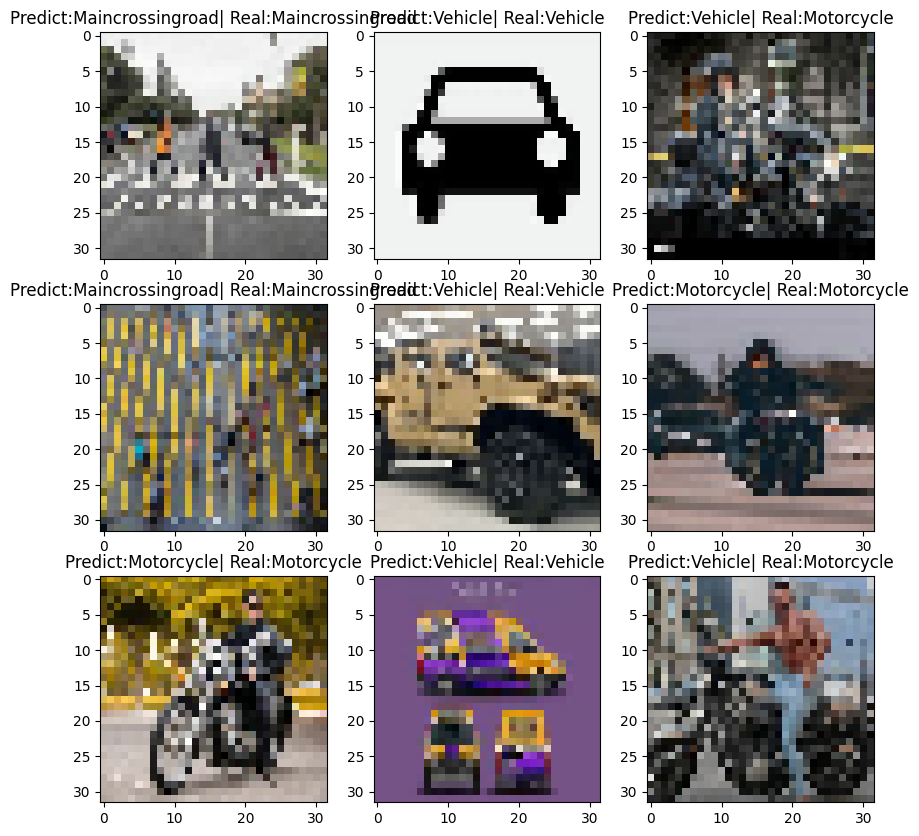

In [ ]:
plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index=numpy.argmax(classifications[i])
    plt.title("Predict:"+class_names[index]+"| Real:"+class_names[labels[i]])

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open('model.tflite','wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmps_1xb0ya'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132169616710672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616712976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616713168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616714128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616713552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616715088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616715280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616716432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616716816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132169616717776: TensorSpec(shape=(), dtype=tf.resource, name=None)
